In [19]:
# link instruksi: https://drive.google.com/file/d/1yceHAwHZomEtqwpR8vuJTuPn1lYl5X_t/preview
# Objective utama: mencari variabel-variabel pengguna yang berhubungan dengan tagihan kesehatan.

# Pada project ini, terdapat data yang akan dianalisis. Harapannya, kita dapat melakukan analisis komprehensif untuk
# mencari tahu variabel mana saja yang dapat diperhitungkan untuk analisis risiko pada sebuah perusahaan asuransi.

# Langkah pertama yang dilakukan adalah melakukan analisis statistik deskriptif sederhana
# namun tentunya kita perlu melihat isi dari data csv yang kita miliki

# import lib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
# kemudian kita import data yang berupa csv ke dalam dataframe agar lebih mudah diolah
df = pd.read_csv('insurance.csv')
display(df)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [21]:
# nah, di sini kita dapat melihat terdapat 1338 data dengan 7 variabel, yaitu umur, jenis kelamin,
# berat massa ideal, jumlah anak tanggungan, perokok atau bukan, wilayah, dan terakhir biaya tagihan premi asuransinya.

# sebelum melanjutkan analisis, ada baiknya kita selalu melakukan pengecekan integritas data,
# apakah ada data yang tidak valid, misal NaN dan lain sebagainya.

df.isna().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [22]:
# semua kolon setelah dicek, ternyata tidak ada data NaN
# selanjutnya kita bisa melakukan analisis deskriptif sederhana
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


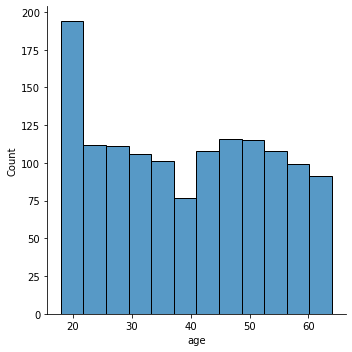

In [23]:
# semua ini adalah data statistik deskriptif dari keseluruhan data, padahal
# kita dapat membaginya menjadi beberapa kelas, misal menggunakan interval umur,
# berdasarkan jenis kelamin, memiliki anak tanggungan atau tidak, dan lain sebagainya.

# sebelum masuk ke sana, kita lakukan visualisasi agar kita dapat lebih mudah melihat
# persebaran dari setiap variabel.

sns.displot(df['age'])

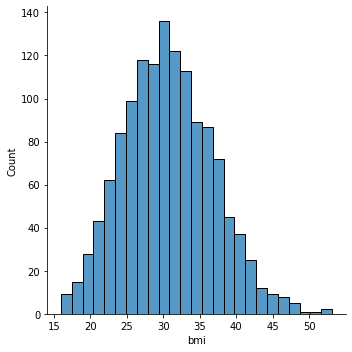

In [24]:
sns.displot(df['bmi'])

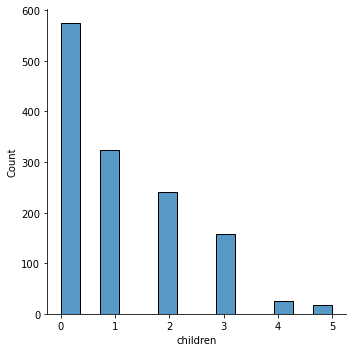

In [25]:
sns.displot(df['children'])

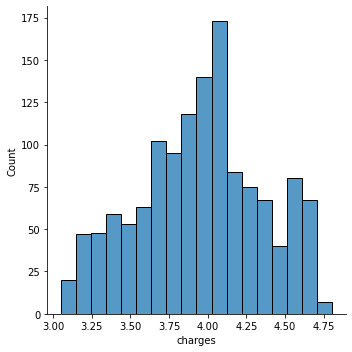

In [26]:
sns.displot(np.log10(df['charges']))

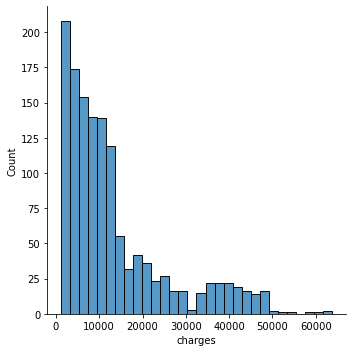

In [27]:
sns.displot((df['charges']))

In [28]:
# perhatikan pada visualisasi biaya (kolom charges), saya menggunakan np.log10()
# tujuannya untuk mempermudah perbandingan untuk seiap 10 kali kenaikan biaya premi

# sedangkan untuk data kategoris, kita lihat juga perbandingannya
data_perokok = df['smoker'].value_counts()
data_gender = df['sex'].value_counts()
data_region = df['region'].value_counts()

print(data_gender)
print(data_perokok)
print(data_region)

male      676
female    662
Name: sex, dtype: int64
no     1064
yes     274
Name: smoker, dtype: int64
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


In [29]:
# nah kita sudah melihat gambaran besar dari persebaran datanya
# kini kita dapat lebih mudah menganalisis dengan menjawab beberapa pertanyaan berikut:

# 1. Berapa rata-rata umur pengguna?
rerata_umur_pengguna = df['age'].mean()
median_umur_pengguna = df['age'].median()
rerata_umur_pengguna, median_umur_pengguna

(39.20702541106129, 39.0)

In [30]:
# 2. Berapa rata-rata nilai BMI dari pengguna yang merokok

rerata_bmi_perokok = df['bmi'][df['smoker'] == 'yes'].mean()
median_bmi_perokok = df['bmi'][df['smoker'] == 'yes'].median()

rerata_bmi_nonperokok = df['bmi'][df['smoker'] == 'no'].mean()
median_bmi_nonperokok = df['bmi'][df['smoker'] == 'no'].median()

print(rerata_bmi_perokok, median_bmi_perokok)
print(rerata_bmi_nonperokok, median_bmi_nonperokok)

30.708448905109503 30.447499999999998
30.651795112781922 30.3525


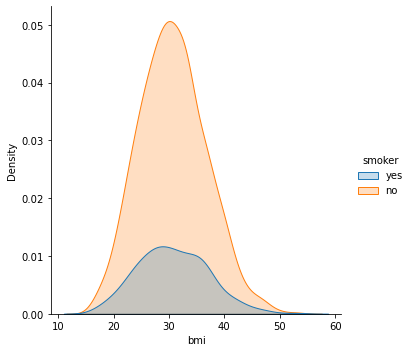

In [31]:
# dari data diperoleh mean dan median tidak terlalu jauh ya,
# bagaimana jika kita bandingkan secara visualisasi?
sns.displot(data=df, x='bmi', hue='smoker', kind='kde', fill=True)

38.51459854014598 38.0
39.38533834586466 40.0


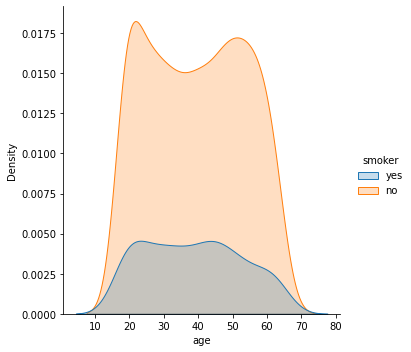

In [32]:
# walaupun keduanya memiliki mean dan median yang tidak jauh, ternyata persebaran
# data bmi untuk non perokok lebih terdistribusi normal (lebih simetrik) jika
# dibandingkan dengan data bmi perokok.

# 3. Berapa rata rata umur pada data tersebut?
rerata_umur_perokok = df['age'][df['smoker'] == 'yes'].mean()
median_umur_perokok = df['age'][df['smoker'] == 'yes'].median()

rerata_umur_nonperokok = df['age'][df['smoker'] == 'no'].mean()
median_umur_nonperokok = df['age'][df['smoker'] == 'no'].median()

print(rerata_umur_perokok, median_umur_perokok)
print(rerata_umur_nonperokok, median_umur_nonperokok)

sns.displot(data=df, x='age', hue='smoker', kind='kde', fill=True)

133207311.20634921
35925420.49611172


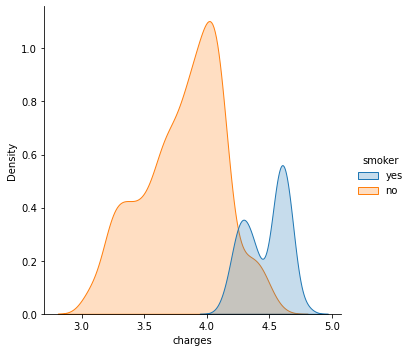

In [33]:
# saatnya semakin masuk pertanyaan advanced
# 4. Apakah variansi dari data charges perokok dan non perokok sama?

charge_var_smoker = df['charges'][df['smoker'] == 'yes'].var()
charge_var_nonsmoker = df['charges'][df['smoker'] == 'no'].var()

print(charge_var_smoker)
print(charge_var_nonsmoker)

sns.displot(data=df, x=np.log10(df['charges']), hue='smoker', kind='kde', fill=True)

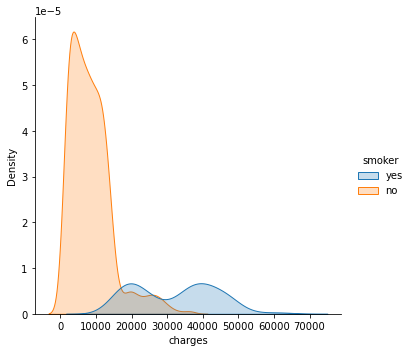

In [34]:
# perhatikan dengan seksama, saya masih menggunakan data log10 untuk variabel data charge,
# tujuannya agar kita lebih mudah melihat pergeseran/selisih biaya secara logaritmik
# grafik yang dibentuk juga lebih mudah dilhat perbedaannya jika dibandingkan tidak menggunakan log10

sns.displot(data=df, x=(df['charges']), hue='smoker', kind='kde', fill=True)

<AxesSubplot:xlabel='age', ylabel='charges'>

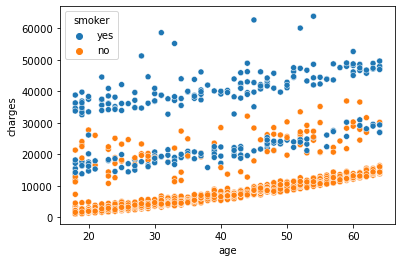

In [35]:
# kita dapat mencoba melakukan analisis korelasi sederhana dengan membandingkan variabel data charge dan umur,
# lalu melihat perbedaannya antara perokok dan non perokok

sns.scatterplot(data=df, x='age', y=(df['charges']), hue='smoker')

<AxesSubplot:xlabel='bmi', ylabel='charges'>

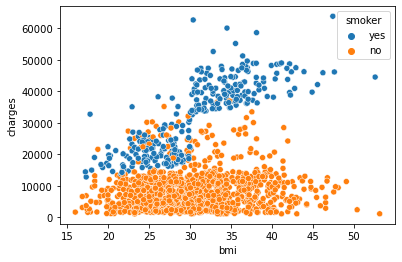

In [36]:
# dengan menggunakan visualisasi, kita dapat melihat setidaknya ada sekitar 4 populasi yang terdapat di dalam data kita.
# nonsmoker yang mengikuti garis linear, nonsmoker yang terscatter di sekitaran populasi smoker, smoker dengan charge yang rendah, somker dgn chaarge tinggi

# kita juga dapat membandingkan bmi terhadap charge premi.
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker')

<AxesSubplot:xlabel='children', ylabel='charges'>

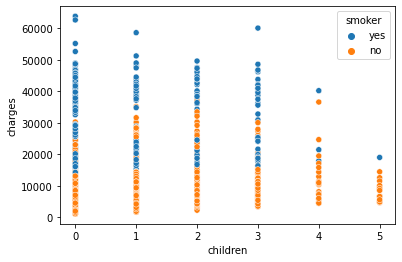

In [37]:
sns.scatterplot(data=df, x='children', y='charges', hue='smoker')

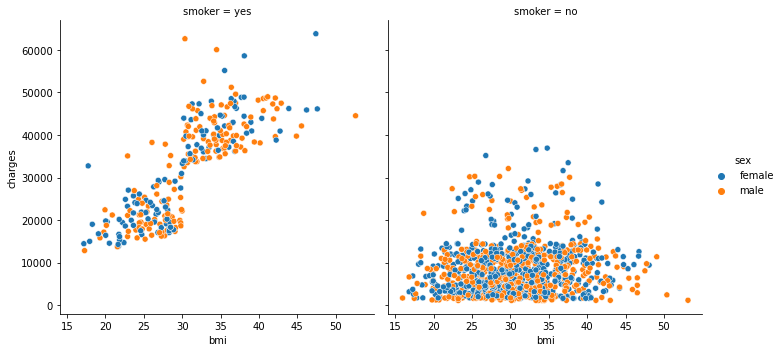

In [38]:
sns.relplot(data=df, x='bmi', y='charges', hue='sex', col='smoker')

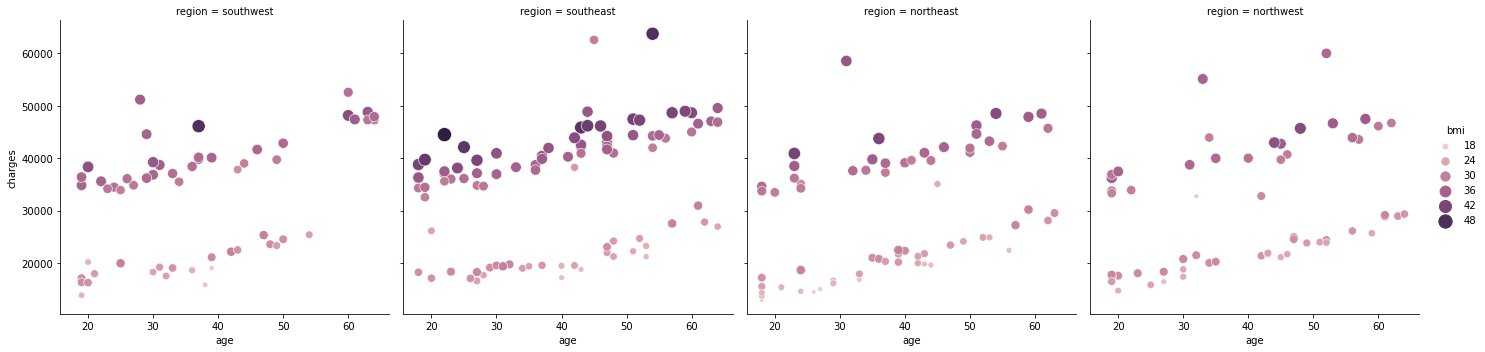

In [39]:
sns.relplot(data=df[df['smoker'] == 'yes'], x='age', y='charges', hue='bmi', col='region', size='bmi', sizes=(20,200))

38.44654088050314 38.0
38.608695652173914 39.0


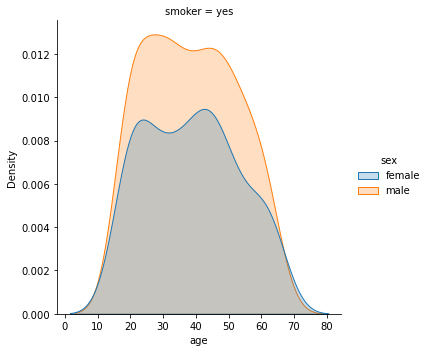

In [40]:
# dari visualisasi kita dapat melihat bahwa
# kelas perokok memiliki biaya premi yang lebih tinggi 10x
# lipat jika dibandingkan kelas non perokok.
# ingat, data yang disajikan dalam format log10()

# 5. Apakah rata rata umur perempuan dan laki-laki yang merokok sama?
rerata_umur_perokokpria = df['age'][(df['smoker'] == 'yes') & (df['sex'] == 'male')].mean()
median_umur_perokokpria = df['age'][(df['smoker'] == 'yes') & (df['sex'] == 'male')].median()

rerata_umur_perokokwanita = df['age'][(df['smoker'] == 'yes') & (df['sex'] == 'female')].mean()
median_umur_perokokwanita = df['age'][(df['smoker'] == 'yes') & (df['sex'] == 'female')].median()

print(rerata_umur_perokokpria, median_umur_perokokpria)
print(rerata_umur_perokokwanita, median_umur_perokokwanita)

sns.displot(data=df, x='age', hue='sex', col=df['smoker'][df['smoker'] == 'yes'], kind='kde', fill=True)

In [41]:
# 6. Mana yang lebih tinggi, rata rata tagihan kesehatan perokok atau non merokok?

rerata_premi_perokok = df['charges'][df['smoker'] == 'yes'].mean()
median_premi_perokok = df['charges'][df['smoker'] == 'yes'].median()

rerata_premi_nonperokok = df['charges'][df['smoker'] == 'no'].mean()
median_premi_nonperokok = df['charges'][df['smoker'] == 'no'].median()

print(rerata_premi_perokok, median_premi_perokok)
print(rerata_premi_nonperokok, median_premi_nonperokok)

32050.23183153285 34456.348450000005
8434.268297856199 7345.4053


In [42]:
(rerata_premi_perokok/rerata_premi_nonperokok)
# perokok memiliki tagihan hampir 4x daripada nonperokok

3.8000014582983206

35116.90965694065 8629.589609712148
4.069360334055563


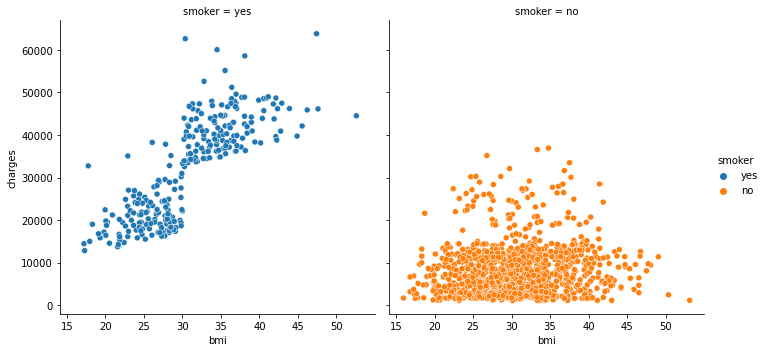

In [43]:
# 7. Mana yang lebih tinggi, rata rata tagihan kesehatan perokok yang BMI nya diatas 25
# atau non perokok yang BMI nya diatas 25

smoker_highbmi = df['charges'][df['smoker'] == 'yes'][df['bmi'] > 25].mean()
smoker_lowerbmi = df['charges'][df['smoker'] == 'no'][df['bmi'] > 25].mean()

print (smoker_highbmi, smoker_lowerbmi)
print(smoker_highbmi/smoker_lowerbmi)

sns.relplot(data=df, y='charges', x='bmi', col='smoker', hue='smoker')

<AxesSubplot:xlabel='smoker', ylabel='charges'>

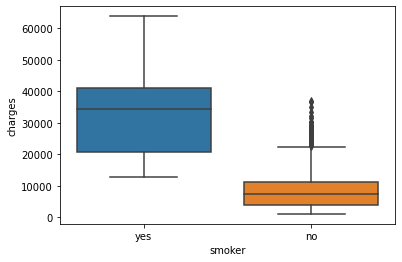

In [44]:
sns.boxplot(data=df, y='charges', x='smoker')

13956.751177721886 12569.57884383534


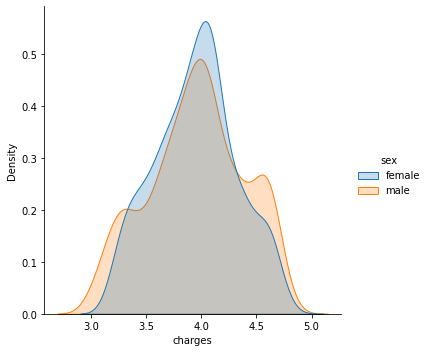

In [45]:
#8. BMI mana yang lebih tinggi, seseorang laki-laki atau perempuan?
men_avg = df['charges'][df['sex'] == 'male'].mean()
women_avg = df['charges'][df['sex'] == 'female'].mean()

print(men_avg, women_avg)

sns.displot(data=df, x=np.log10(df['charges']), hue='sex', kind='kde', fill=True)

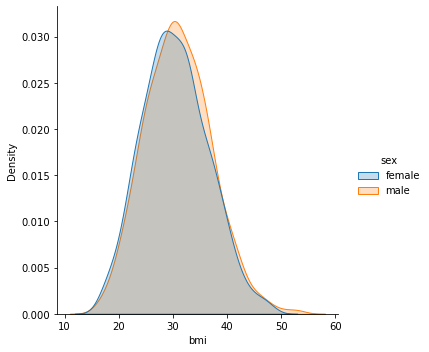

In [46]:
sns.displot(data=df, x='bmi', hue='sex', kind='kde', fill=True)

30.708448905109503 30.651795112781922


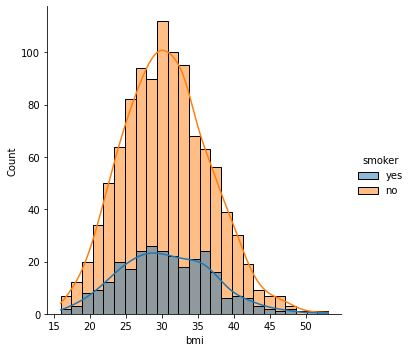

In [47]:
# 9. BMI mana yang lebih tinggi, BMI perokok atau nonperokok?
bmi_smoker = df['bmi'][df['smoker'] == 'yes'].mean()
bmi_nonsmoker = df['bmi'][df['smoker'] == 'no'].mean()

print(bmi_smoker, bmi_nonsmoker)

sns.displot(data=df, x='bmi', hue='smoker', kde=True, fill=True)

In [48]:
# PART 2
# ------

#1. Gender mana yang memiliki tagihan paling tinggi?
max_man = max(df['charges'][df['sex'] == 'male'])
max_woman = max(df['charges'][df['sex'] == 'female'])

print(max_man, max_woman)


62592.87309 63770.42801


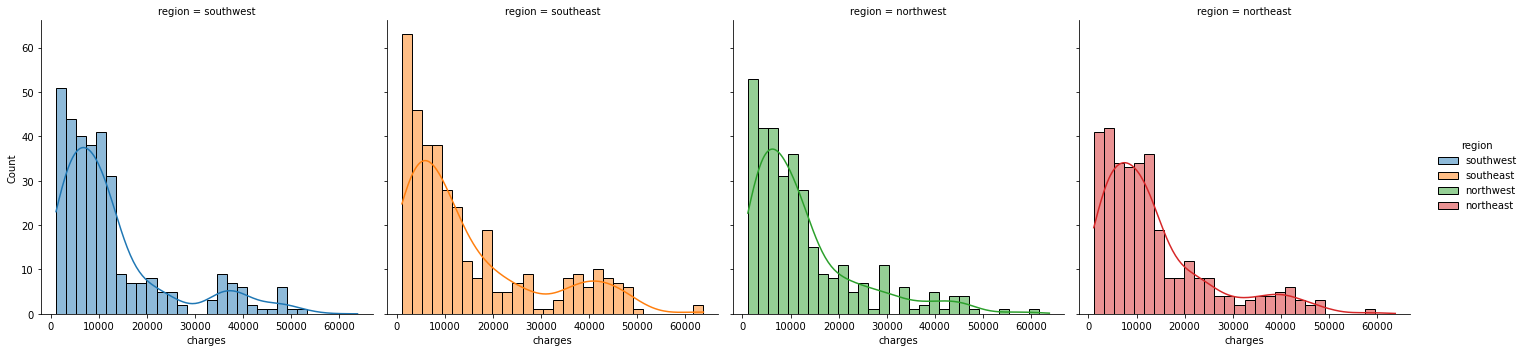

In [49]:
# 2. Distribusi peluang tagihan di tiap-tiap region

sns.displot(data=df, x='charges', hue='region', col='region', kde=True)

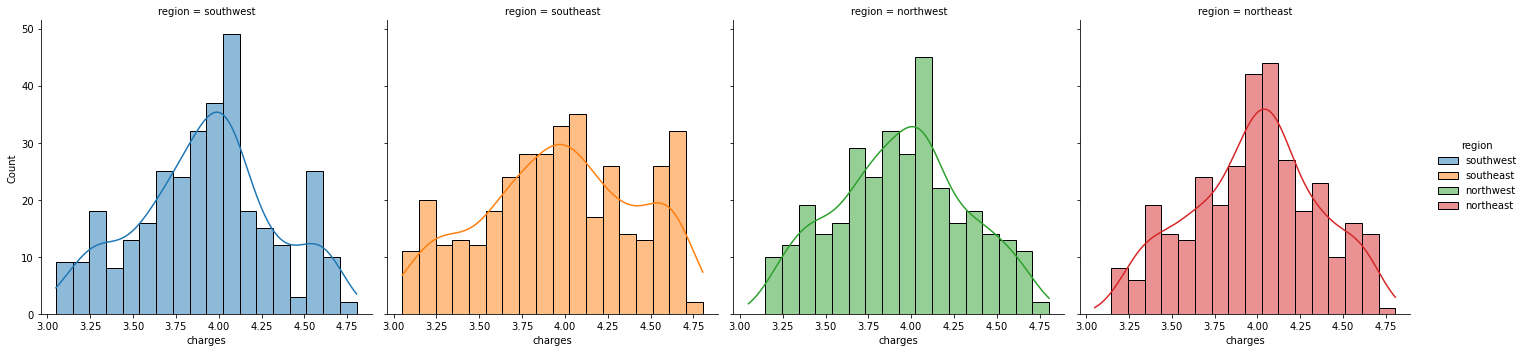

In [50]:
sns.displot(data=df, x=np.log10(df['charges']), hue='region', col='region', kde=True)

In [51]:
#3. Apakah setiap region memiliki proporsi data banyak orang yang sama?
data_region = df['region'].value_counts()
data_region

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [52]:
# 4. Mana yang lebih tinggi proporsi perokok atau non perokok?
data_perokok = df['smoker'].value_counts()
data_perokok

no     1064
yes     274
Name: smoker, dtype: int64

In [53]:
# 5. Berapa peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok?
P_women_smoker = len(df[df['smoker'] == 'yes'][df['sex'] == 'female']) / len(df[df['smoker'] == 'yes'])
P_women_smoker

C:\Users\ASUS\AppData\Local\Temp/ipykernel_10288/1932657247.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  P_women_smoker = len(df[df['smoker'] == 'yes'][df['sex'] == 'female']) / len(df[df['smoker'] == 'yes'])


0.4197080291970803

In [54]:
#6. Berapa peluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok?
P_men_smoker = 1 - P_women_smoker
P_men_smoker

0.5802919708029197

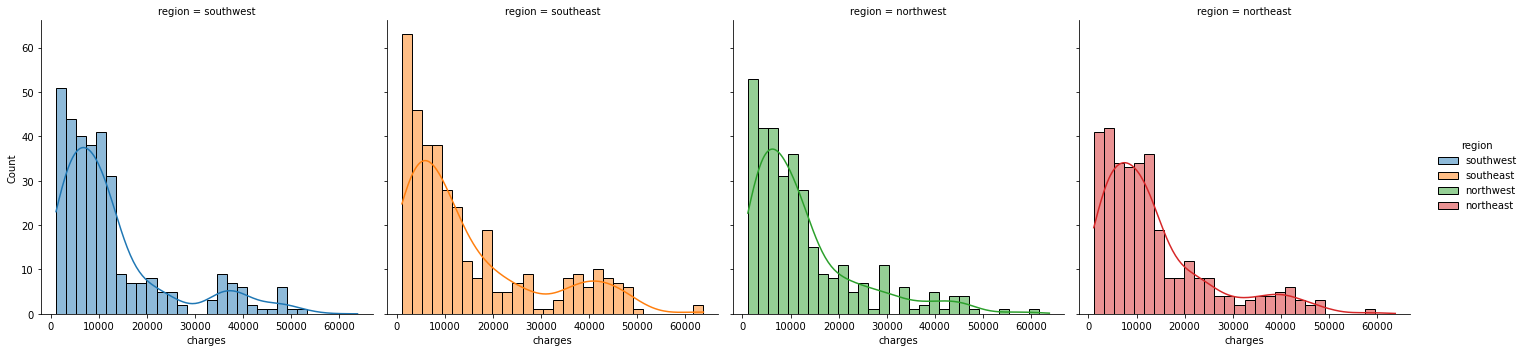

In [55]:
#7. Bagaimana bentuk distribusi peluang besar tagihan dari tiap-tiap region?
# Exponensial
sns.displot(data=df, x='charges', hue='region', col='region', kde=True)

In [56]:
# PART 3
# ------

# 1. Mana yang lebih mungkin terjadi
# a. Seseorang dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k,
# atau
# b. Seseorang dengan BMI dibawah 25 mendapatkan tagihan kesehatan diatas
# 16.7k

#pendekatan perhitungan matematis
# jumlah pengguna yang BMInya di atas 25
high_bmi = len(df[df['bmi'] > 25])
high_bmi_overcharge = len(df[df['bmi'] > 25][df['charges'] > 16700])

val_1a = high_bmi_overcharge/high_bmi

# jumlah pengguna yang BMInya di bawah 25
low_bmi = len(df[df['bmi'] <= 25])
low_bmi_overcharge = len(df[df['bmi'] <= 25][df['charges'] > 16700])
val_1b = low_bmi_overcharge/low_bmi

print(val_1a, val_1b)

0.25939505041246563 0.20647773279352227


C:\Users\ASUS\AppData\Local\Temp/ipykernel_10288/325897287.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  high_bmi_overcharge = len(df[df['bmi'] > 25][df['charges'] > 16700])
C:\Users\ASUS\AppData\Local\Temp/ipykernel_10288/325897287.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  low_bmi_overcharge = len(df[df['bmi'] <= 25][df['charges'] > 16700])


In [57]:
# 2. Mana yang lebih mungkin terjadi
# a. Seseorang perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan
# diatas 16.7k, atau
# b. Seseorang non perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan
# diatas 16.7k

# jumlah pengguna perokok yang BMInya di atas 25
smokerhigh_bmi = len(df[df['smoker'] == 'yes'][df['bmi'] > 25])
smokerhigh_bmi_overcharge = len(df[df['smoker'] == 'yes'][df['bmi'] > 25][df['charges'] > 16700])

val_2a = smokerhigh_bmi_overcharge/smokerhigh_bmi


# jumlah pengguna yang BMInya di bawah 25
nonsmokerhigh_bmi = len(df[df['smoker'] == 'no'][df['bmi'] > 25])
nonsmokerhigh_bmi_overcharge = len(df[df['smoker'] == 'no'][df['bmi'] > 25][df['charges'] > 16700])

val_2b = nonsmokerhigh_bmi_overcharge/nonsmokerhigh_bmi

print(val_2a, val_2b)

0.9817351598173516 0.0779816513761468


C:\Users\ASUS\AppData\Local\Temp/ipykernel_10288/3525876864.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  smokerhigh_bmi = len(df[df['smoker'] == 'yes'][df['bmi'] > 25])
C:\Users\ASUS\AppData\Local\Temp/ipykernel_10288/3525876864.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  smokerhigh_bmi_overcharge = len(df[df['smoker'] == 'yes'][df['bmi'] > 25][df['charges'] > 16700])
C:\Users\ASUS\AppData\Local\Temp/ipykernel_10288/3525876864.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nonsmokerhigh_bmi = len(df[df['smoker'] == 'no'][df['bmi'] > 25])
C:\Users\ASUS\AppData\Local\Temp/ipykernel_10288/3525876864.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  nonsmokerhigh_bmi_overcharge = len(df[df['smoker'] == 'no'][df['bmi'] > 25][df['charges'] > 16700])


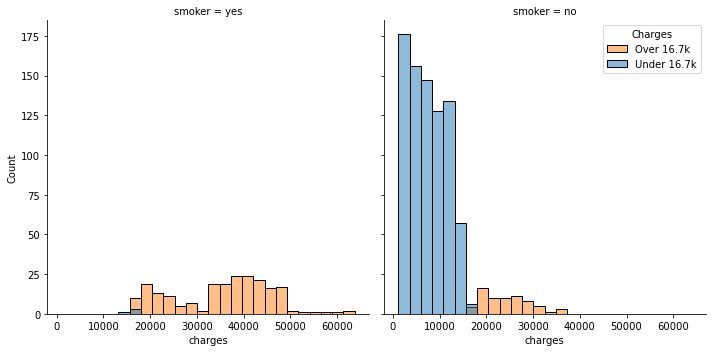

In [58]:
sns.displot(data=df[df['bmi'] > 25], x='charges', hue=(df['charges'] > 16700), col='smoker', legend=False)#.refline(x=16700, c='r', label='batas 16.7k')
plt.legend(title='Charges', loc='upper right', labels=['Over 16.7k', 'Under 16.7k'])

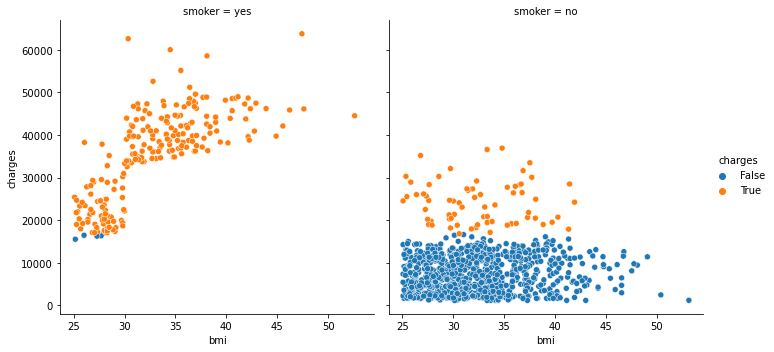

In [59]:
sns.relplot(data=df[df['bmi'] > 25], x='bmi', y='charges', hue=(df['charges'] > 16700), col='smoker',)

C:\Users\ASUS\AppData\Local\Temp/ipykernel_10288/4271499358.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.scatterplot(data=df[df['smoker'] =='yes'][df['bmi'] > 30], x='age', y=(df['charges']), color='tab:red', label="Smoker high BMI", alpha=0.5)
C:\Users\ASUS\AppData\Local\Temp/ipykernel_10288/4271499358.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.scatterplot(data=df[df['smoker'] =='yes'][df['bmi'] <= 30], x='age', y=(df['charges']), color='tab:orange', label="Smoker lower BMI", alpha=0.5)


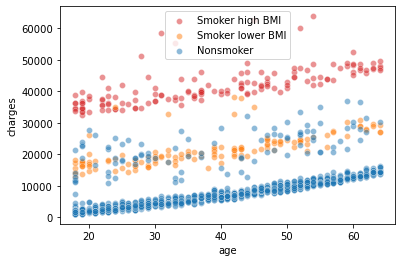

In [85]:
# Part 4
# ------

# Setelah menjawab kondisi-kondisi yang lebih mungkin memiliki tagihan kesehatan yang tinggi
# dari langkah sebelumnya. Kita juga dapat mencari keterhubungan antara kondisi-kondisi
# tersebut dengan tagihan kesehatan. Analisa korelasi akan diperlukan disini. Anda bisa memilih
# mengecek korelasi tagihan kesehatan minimal dengan 2 variabel lainnya.

# berdasarkan dua grafik ini, kita dapat mengelompokkan variabel umur (age) dan bmi sebagai
# variabel yang mempengaruhi nilai tagihan kesehatan

sns.scatterplot(data=df[df['smoker'] =='yes'][df['bmi'] > 30], x='age', y=(df['charges']), color='tab:red', label="Smoker high BMI", alpha=0.5)
sns.scatterplot(data=df[df['smoker'] =='yes'][df['bmi'] <= 30], x='age', y=(df['charges']), color='tab:orange', label="Smoker lower BMI", alpha=0.5)
sns.scatterplot(data=df[df['smoker'] =='no'], x='age', y=(df['charges']), color='tab:blue', label="Nonsmoker", alpha=0.5)

plt.legend(loc='best')

In [ ]:
# Pada analisis hubungan korelasi umur dan tagihan kesehatan,
# dapat dilihat untuk kelompok nonsmoker berkorelasi positif,
# artinya seiring meningkatnya usia, maka tagihan kesehatan juga
# akan meningkat.

# Sedangkan untuk kelompok smoker, maka akan dibagi menjadi
# dua subkelompok lagi, yaitu smoker dengan BMI di atas 30 dan
# di bawah 30.

# Pernyataan tersebut dapat terlihat pada grafik kedua:

C:\Users\ASUS\AppData\Local\Temp/ipykernel_10288/4267572681.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.scatterplot(data=df[df['smoker'] =='yes'][df['bmi'] > 30], x='bmi', y=(df['charges']), color='tab:red', label="Smoker high BMI", alpha=0.7)
C:\Users\ASUS\AppData\Local\Temp/ipykernel_10288/4267572681.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.scatterplot(data=df[df['smoker'] =='yes'][df['bmi'] <= 30], x='bmi', y=(df['charges']), color='tab:orange', label="Smoker lower BMI", alpha=0.7)


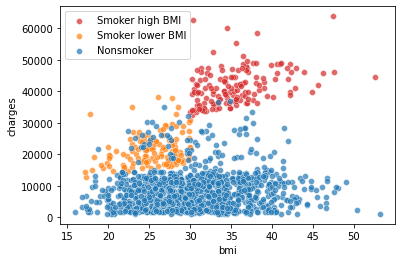

In [101]:
sns.scatterplot(data=df[df['smoker'] =='yes'][df['bmi'] > 30], x='bmi', y=(df['charges']), color='tab:red', label="Smoker high BMI", alpha=0.7)
sns.scatterplot(data=df[df['smoker'] =='yes'][df['bmi'] <= 30], x='bmi', y=(df['charges']), color='tab:orange', label="Smoker lower BMI", alpha=0.7)
sns.scatterplot(data=df[df['smoker'] =='no'], x='bmi', y=(df['charges']), color='tab:blue', label="Nonsmoker", alpha=0.7)

plt.legend(loc='best')

In [124]:
# dengan menggunakan pendekatan matematika, kita dapat pula melakukan
# analisis korelasi menggunakan persamaan korelasi antar variabel.
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [126]:
df[df['smoker'] == 'no'].corr()

,age,bmi,children,charges
age,1.000000,0.122638,0.033395,0.627947
bmi,0.122638,1.000000,0.019208,0.084037
children,0.033395,0.019208,1.000000,0.138929
charges,0.627947,0.084037,0.138929,1.000000


In [128]:
df[df['smoker'] == 'yes'].corr()

,age,bmi,children,charges
age,1.000000,0.059674,0.081183,0.368224
bmi,0.059674,1.000000,-0.012619,0.806481
children,0.081183,-0.012619,1.000000,0.035945
charges,0.368224,0.806481,0.035945,1.000000


In [133]:
df[df['smoker'] == 'yes'][df['bmi'] > 30].corr()

C:\Users\ASUS\AppData\Local\Temp/ipykernel_10288/3119203571.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['smoker'] == 'yes'][df['bmi'] > 30].corr()


,age,bmi,children,charges
age,1.000000,0.018267,0.109038,0.697570
bmi,0.018267,1.000000,0.083342,0.365062
children,0.109038,0.083342,1.000000,0.136090
charges,0.697570,0.365062,0.136090,1.000000


In [134]:
df[df['smoker'] == 'yes'][df['bmi'] <= 30].corr()

C:\Users\ASUS\AppData\Local\Temp/ipykernel_10288/3369817884.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['smoker'] == 'yes'][df['bmi'] <= 30].corr()


,age,bmi,children,charges
age,1.000000,0.074709,0.052152,0.694177
bmi,0.074709,1.000000,-0.136854,0.304681
children,0.052152,-0.136854,1.000000,0.039357
charges,0.694177,0.304681,0.039357,1.000000


In [135]:
# dari analisis korelasi tersebut, dapat diketahui bahwa
# variabel age memiliki moderate-to-strong correlationship
# terhadap tagihan biaya kesehatan

# sedangkan BMI berkorelasi kuat hanya pada kelompok smoker

In [142]:
# Part 5
# ------
# Uji hipotesis

# 1. Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok
# untuk melakukan perhitungan uji  tersebut, maka pertama-tama kita harus membuat hipotesis
# kemudian menentukan uji statistik yang tepat.

# karena data yang kira miliki adalah data dari kelompok yang lebih besar lagi (data kita adalah sample),
# maka kita dapat menggunakan T-Test

# t = (x̄1 - x̄2) / sqrt(s1^2/n1 + s2^2/n2)

# di mana:
# x̄1 adalah rata-rata tagihan kesehatan perokok
# x̄2 adalah rata-rata tagihan kesehatan non-perokok
# s1 adalah standar deviasi tagihan kesehatan perokok
# s2 adalah standar deviasi tagihan kesehatan non-perokok
# n1 adalah jumlah sampel perokok
# n2 adalah jumlah sampel non-perokok

# nilai yang diperoleh dibandingkan untuk menentukan signifikansi statistik dari perbedaan yang diperoleh
# kita jg dapat melakukan uji t-test dengan bantuan library scipy
# h0 = tidak terdapat perbedaan tagihan kesehatan antara kedua kelompok
# ha = terdapat perbedaan, dengan perokok memiliki tagihan yg lebih tinggi

# import t-test independen
from scipy.stats import ttest_ind
stat, p = ttest_ind(a=df['charges'][df['smoker'] == 'yes'],
                    b=df['charges'][df['smoker'] == 'no'],
                    equal_var=False,
                    alternative='greater') # eaual_var= False karena varians kedua populasi berbeda

# Interpretasi Hasil
print('Statistics = %.4f, p-value = %.4f' % (stat, p)) 

# nilai p value menyatakan hipotesis null ditolak
# maka dapat dikatakan bahwa terdapat perbedaan yang signifikan antara rata-rata tagihan kesehatan perokok dan non-perokok.

Statistics = 32.7519, p-value = 0.0000


In [153]:
# 2. Proporsi perokok laki laki lebih besar dari perempuan
# Menggunakan uji hipotesis proporsi satu sampel:
# z = (p̂ - p) / sqrt(p * (1 - p) / n)

# h0 = proporsi perokok pria dan wanita sama
# ha = proporsi perokok pria lebih besar, maka digunakan uji satu pihak right tailed

import scipy.stats as stats
import math

# Menentukan jumlah kejadian ukuran sampel (n), proporsi pada null hypothesis, dan proporsi sample
n = len(df[df['smoker'] == 'yes'])
p_hat = len(df[df['smoker'] == 'yes'][df['sex'] == 'male'])
p0 = 0.5    # asumsi jenis kelamin perokok sama

z_test = (p_hat - p0) / math.sqrt(p0 * (1-p0) / n)
print(z_test)
# z_test merupakan nilai z pada kurva distribusi normal,
# kemudian kita dapat membandingkan dengan nilai Z pada tabel

# nilai signifikansi (alfa) = 0.05
z_critical = stats.norm.ppf(1-0.05)  # right-tailed test
print(z_critical)

# z_test berada di sebelah kanan dari z_critical
# artiknya perada dalam area penolakan
# sehingga kita dapat menolak hipotesis null

# kita dapat menentukan nilai p-value
p_value= 1-stats.norm.cdf(z_test)     # uji pihak kanan
print(p_value)

# nilai p value menyatakan hipotesis null ditolak
# maka dapat dikatakan bahwa terdapat proporsi perokok laki laki lebih besar dari perempuan

5247.283678247251
1.6448536269514722
0.0


C:\Users\ASUS\AppData\Local\Temp/ipykernel_10288/2751238259.py:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  p_hat = len(df[df['smoker'] == 'yes'][df['sex'] == 'male'])


In [160]:
# 3. Variansi tagihan kesehatan perokok dan non perokok sama
# Uji hipotesis yang digunakan adalah uji simultan (F test)

# ho = var(perokok) == var(nonperokok)
# ha = var(perokok) != var(nonperokok)

# F = var(A) / var(B)
# dengan var(A) > var(B)

var_perokok = np.var(df['charges'][df['smoker'] == 'yes'], ddof=1) # ddof (delta degree of freedom), bernilai 1 karena merupakan variansi sampel
var_nonperokok = np.var(df['charges'][df['smoker'] == 'no'], ddof=1)

# var penyebut harus lebih besar dari var pembilang
byk_perokok = len(df[df['smoker'] == 'yes'])
byk_nonperokok = len(df[df['smoker'] == 'no'])

if var_perokok > var_nonperokok:
    # perhitungan f_test dan f_critical
    f_test = var_perokok/var_nonperokok
    f_critical = stats.f.ppf(1-0.05, byk_perokok-1, byk_nonperokok-1)
else:
    f_test = (var_perokok/var_nonperokok)**(-1)
    f_critical = stats.f.ppf(1-0.05, byk_nonperokok-1, byk_perokok-1)
    
print(f_test, f_critical)

3.7078845387701587 1.1662297531965873


In [158]:
# karena nilai f_test lebih besar dari f_critical (berada di dalam daerah penolakan),
# maka hipotesis null ditolak,
# sehingga dapat dikatakan variansi tagihan kesehatan perokok dan non perokok berbeda

2.0824537182164797

In [166]:
# 4. Tagihan kesehatan dengan BMI diatas 25 lebih tinggi daripada tagihan kesehatan
# dengan BMI dibawah 25

# h0 = charges high_BMI sama dengan charges lower_BMI
# h0 = charges high_BMI > charges lower_BMI
# uji hipotesis menggunakan t_test

t_test, p_value = ttest_ind(a=df['charges'][df['bmi'] > 25],
                    b=df['charges'][df['bmi'] <= 25],
                    equal_var=False,
                    alternative='greater')

t_critical = stats.t.ppf(1-0.05, df=max(len(df[df['bmi'] > 25]), len(df[df['bmi'] <= 25])))

print(t_test, t_critical)
print(p_value)
# p_value lebih kecil dari nilai taraf signifikansi 0.05,
# maka hipotesis null ditolak.
# Kesimpulan: Tagihan kesehatan dengan BMI diatas 25 lebih tinggi daripada tagihan kesehatan dengan BMI dibawah 25

5.953486371741479 1.6462514928708307
2.198585436885263e-09


In [171]:
# 5. Tagihan kesehatan laki-laki lebih besar dari perempuan

t_test, p_value = ttest_ind(a=df['charges'][df['sex'] == 'male'],
                    b=df['charges'][df['sex'] == 'female'],
                    equal_var=False,
                    alternative='greater')

t_critical = stats.t.ppf(1-0.05, df=max(len(df[df['sex'] == 'male']), len(df[df['sex'] == 'female'])))
print(t_test, t_critical)
print(p_value)

2.1008878232359565 1.6471108343361842
0.017920507478008323


In [172]:
# p_value lebih kecil dari nilai taraf signifikansi 0.05,
# maka hipotesis null ditolak.
# Kesimpulan: Tagihan kesehatan laki-laki lebih besar dari perempuan

# note: penarikan kesimpulan ini valid pada taraf signifikansi 0.05, namun tidak berlaku pada taraf signifikansi 0.01